<a href="https://colab.research.google.com/github/Mahbub511/Fake-Job-Circular-Predictor/blob/main/final_Fakejob_posting_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem Statement : For a given dataset which is the best classification algorithm(as per accuracy) 
for predicting fake job postings.
Dataset : 'fake_job_postings.csv'


importing libraries


In [ ]:
#Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Reading csv file of dataset
df = pd.read_csv("/content/drive/MyDrive/ML Dataset/5_6118600372543030347.csv")
df.head()   #Display the first 5 examples in the dataset

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


exploring dataset


In [ ]:
df.columns #column names of the dataset


Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
##Info about the data shape of data, type of individual columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
df.shape

(17880, 18)

Feature selection

In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
df = df[['title', 'location','company_profile', 'requirements', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function','salary_range',
       'fraudulent']]

In [ ]:
df.head()

,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,0,1,0,Other,Internship,NaN,NaN,Marketing,NaN,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,NaN,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,NaN,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,NaN,0


Checking Missing Values

In [ ]:
# Check if there is any null value
df.isna().apply(pd.value_counts)

,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
False,17880.0,17534,14572,15185,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,2868,17880.0
True,NaN,346,3308,2695,NaN,NaN,NaN,3471,7050,8105,4903,6455,15012,NaN


In [ ]:
#Check for number of null values
df.isnull().sum()

title                      0
location                 346
company_profile         3308
requirements            2695
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
salary_range           15012
fraudulent                 0
dtype: int64

In [ ]:
#Check if any duplicate rows in dataset
df.duplicated().sum()

493

In [ ]:
#drop the duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(17387, 14)

In [ ]:
#Differentiate categorical data and numerical data
df_num = df[['telecommuting','has_company_logo','has_questions','fraudulent','salary_range']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

In [ ]:
df_num.head()

,telecommuting,has_company_logo,has_questions,fraudulent,salary_range
0,0,1,0,0,NaN
1,0,1,0,0,NaN
2,0,1,0,0,NaN
3,0,1,0,0,NaN
4,0,1,1,0,NaN


In [ ]:
df_cat.head()

,title,location,company_profile,requirements,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,Other,Internship,NaN,NaN,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


In [ ]:
df.isnull().sum()

title                      0
location                 340
company_profile         3255
requirements            2549
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3397
required_experience     6858
required_education      7889
industry                4769
function                6261
salary_range           14580
fraudulent                 0
dtype: int64

In [ ]:
df.dropna(axis= 0, how= 'any', inplace=True)

In [ ]:
df.isnull().sum()

title                  0
location               0
company_profile        0
requirements           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
salary_range           0
fraudulent             0
dtype: int64

In [ ]:
df.shape

(1485, 14)

**`Balancing dataset`**

---


now we need to check if our dataset is balanced or not.
Unbalanced dataset can lead to biased results for our model.

In [ ]:
df['fraudulent'].value_counts()

0    1403
1      82
Name: fraudulent, dtype: int64

As we can see,we have very imbalanced dataset, need to balance it first and then train our model.

- -> Separete fraudulent and non fraudulent dataframes:

In [ ]:
df['fraudulent'].values

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
fraud = df[df['fraudulent']== 1]
fraud.shape

(82, 14)

In [ ]:
not_fraud = df[df['fraudulent']== 0]
not_fraud.shape

(1403, 14)

we can oversample 'fraud' dataframe in order to get balanced dataset.

In [ ]:
fraud = fraud.sample(1403, replace=True)

In [ ]:
fraud.shape, not_fraud.shape

((1403, 14), (1403, 14))

Now our dataset is balanced:)

In [ ]:
df = fraud.append(not_fraud)
df.reset_index()

,index,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
0,2897,Support Team Member,"US, TX, Austin","Since 2005, American Secured Benefits, a leadi...",High School Diploma or EquivalentBasic Compute...,1,1,0,Full-time,Entry level,High School or equivalent,Insurance,Customer Service,25000-35000,1
1,4668,Human Resource Director,"US, TX, AUSTIN",As the industry’s largest supply contracting c...,Minimum of 6 Months corporate Human Resources...,0,1,1,Full-time,Director,High School or equivalent,Human Resources,Human Resources,50000-65000,1
2,11769,Product Development Engineer PLC,"TW, TPQ, Taipei",Aptitude Staffing Solutions has redesigned the...,Skills and Requirements: At least 5+ years PLC...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Networking,Engineering,120000-180000,1
3,5808,Employee Relations Specialist,"US, TX, Austin",As the industry’s largest supply contracting c...,Minimum of three (3) years of work Novationoff...,0,1,1,Full-time,Entry level,High School or equivalent,Human Resources,Administrative,35000-45000,1
4,9823,Health + Safety Professional,"US, CA, Bakersfield",Macpherson Oil and Refined Resources have part...,Duties and Responsibilities:Provides safety po...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Other,80000-120000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,17439,Senior Trusts Manager,"GB, LND, Kingston upon Thames",VSO brings people together to fight poverty by...,The applicantVSO is looking for an individual ...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,International Trade and Development,Business Development,39000-41000,0
2802,17488,Management Accountant,"NZ, N, Auckland",PowerbyProxi and its customers are leading a r...,"Reporting to the CFO, the Management Accountan...",0,1,0,Contract,Mid-Senior level,Bachelor's Degree,Electrical/Electronic Manufacturing,Finance,100000-110000,0
2803,17515,Marketing manager,"GR, B, Thessaloniki",A vacation rental platform that will re-invent...,Perfect use of English and Greek language. Soc...,0,1,0,Part-time,Associate,Bachelor's Degree,"Leisure, Travel & Tourism",Marketing,5000-7000,0
2804,17849,Communication Designer,"US, CA, San Francisco",Balanced Labs exists to provide accountants an...,"Specifically, we’re looking for:5+ years of vi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,80000-100000,0


We have so much categorical data, so we need to convert it to numerical data.
To do so, we perform LabelEncoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])
df['salary_range'] = le.fit_transform(df['salary_range'])

In [ ]:
df = df.reset_index()
df.head()

,index,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
0,2897,1083,395,301,528,1,1,0,1,2,4,45,7,224,1
1,4668,493,393,49,1273,0,1,1,1,1,4,41,17,386,1
2,11769,791,210,42,943,0,1,1,1,5,1,15,12,70,1
3,5808,335,395,49,637,0,1,1,1,2,4,41,1,302,1
4,9823,487,229,217,395,0,1,1,1,5,1,63,23,470,1


#Data Visulization 

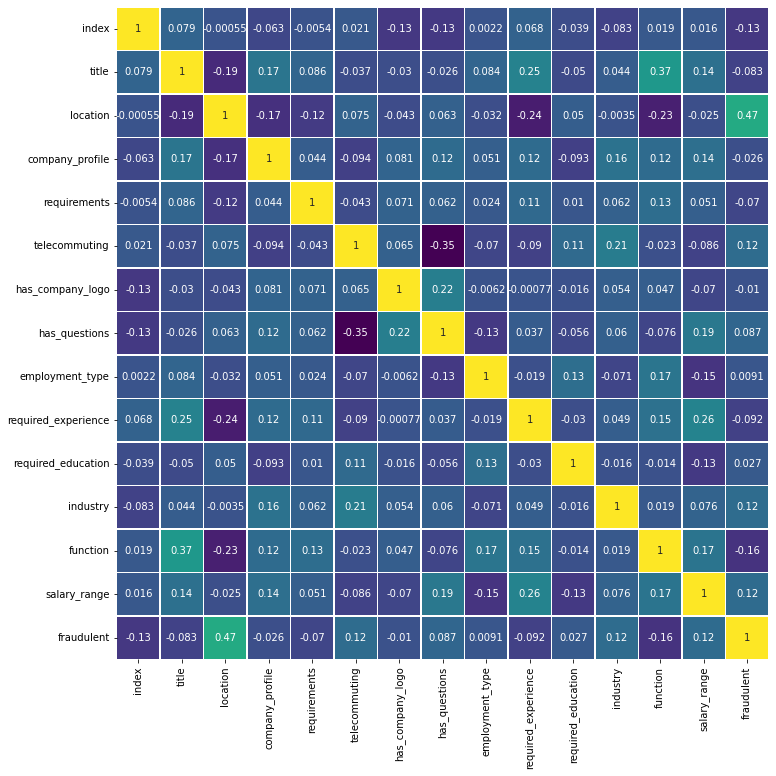

In [ ]:
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True, square = True, linewidths = 0.2, cmap = 'viridis', cbar = False)

Split dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['index', 'title', 'location', 'company_profile', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'salary_range']].values
Y = df[['fraudulent']].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.20)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2244, 14), (562, 14), (2244, 1), (562, 1))

Now we will apply 5 different classification algorithms to gain maximum possible accuracy score which are:

1) Logistic Regression
2) K Nearest Neighbours
3) Random Forest
4)Naive Bayes
5)Decision Tree



---


For training these models,

Independent variable : X
Dependent variable : Y (Check if posted job is fake or not)

**1) Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LgR = LogisticRegression()

In [ ]:
LgR.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
Y_pred = LgR.predict(X_test)


In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()


In [ ]:
Y_test.shape, Y_pred.shape

((562,), (562,))

In [ ]:
df_lgr = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_lgr

,Y_test,Y_pred
0,0,0
1,0,0
2,0,1
3,1,1
4,1,1
...,...,...
557,0,1
558,0,1
559,0,0
560,0,0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score



[[181 103]
 [ 81 197]]
Report               precision    recall  f1-score   support

           0       0.69      0.64      0.66       284
           1       0.66      0.71      0.68       278

    accuracy                           0.67       562
   macro avg       0.67      0.67      0.67       562
weighted avg       0.67      0.67      0.67       562

Accuracy of Logistic Regression = 0.6725978647686833


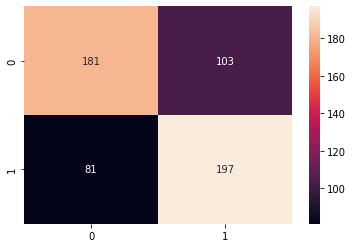

In [ ]:
print(confusion_matrix(Y_test, Y_pred))
print("Report",classification_report(Y_test, Y_pred))
print("Accuracy of Logistic Regression =",accuracy_score(Y_test,Y_pred))

cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt="d")

**2) K Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
Y_pred = knn.predict(X_test)

In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
df_knn = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_knn

,Y_test,Y_pred
0,0,0
1,0,0
2,0,1
3,1,1
4,1,1
...,...,...
557,0,0
558,0,0
559,0,1
560,0,0


[[254  30]
 [  0 278]]
Report               precision    recall  f1-score   support

           0       1.00      0.89      0.94       284
           1       0.90      1.00      0.95       278

    accuracy                           0.95       562
   macro avg       0.95      0.95      0.95       562
weighted avg       0.95      0.95      0.95       562

Accuracy of KNN = 0.9466192170818505


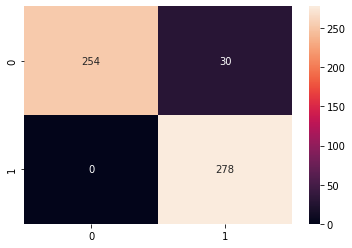

In [ ]:
print(confusion_matrix(Y_test, Y_pred))
print("Report",classification_report(Y_test, Y_pred))
print("Accuracy of KNN =",accuracy_score(Y_test,Y_pred))
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt="d")

**3) Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=5)

In [ ]:
rfc.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=5)

In [ ]:
Y_pred = rfc.predict(X_test)

In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
df_rfc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_rfc

,Y_test,Y_pred
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
557,0,0
558,0,0
559,0,0
560,0,0


[[283   1]
 [  0 278]]
Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       278

    accuracy                           1.00       562
   macro avg       1.00      1.00      1.00       562
weighted avg       1.00      1.00      1.00       562

Accuracy of Random Forest = 0.998220640569395


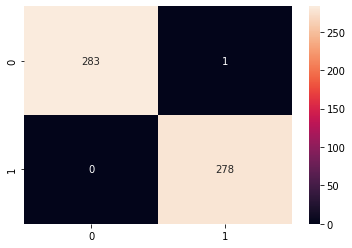

In [ ]:
print(confusion_matrix(Y_test, Y_pred))
print("Report",classification_report(Y_test, Y_pred))
print("Accuracy of Random Forest =",accuracy_score(Y_test,Y_pred))
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt="d")

**4)Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_test=Y_test.flatten()
Y_pred= Y_pred.flatten()

In [ ]:
df_MNB = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_MNB

,Y_test,Y_pred
0,0,1
1,0,0
2,0,1
3,1,0
4,1,1
...,...,...
557,0,1
558,0,0
559,0,0
560,0,0


[[178 106]
 [ 82 196]]
Report               precision    recall  f1-score   support

           0       0.68      0.63      0.65       284
           1       0.65      0.71      0.68       278

    accuracy                           0.67       562
   macro avg       0.67      0.67      0.67       562
weighted avg       0.67      0.67      0.67       562

Accuracy of Naive Bayes = 0.6654804270462633


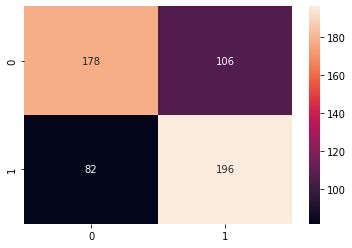

In [ ]:
print(confusion_matrix(Y_test, Y_pred))
print("Report",classification_report(Y_test, Y_pred))
accuracy_score(Y_test,Y_pred)
print("Accuracy of Naive Bayes =",accuracy_score(Y_test,Y_pred))
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt="d")

**5)Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [ ]:
DTclassifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_pred=DTclassifier.predict(X_test)

In [ ]:
Y_test=Y_test.flatten()
Y_pred= Y_pred.flatten()

In [ ]:
df_DT = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_DT

,Y_test,Y_pred
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
557,0,0
558,0,0
559,0,0
560,0,0


[[282   2]
 [  0 278]]
Report               precision    recall  f1-score   support

           0       1.00      0.99      1.00       284
           1       0.99      1.00      1.00       278

    accuracy                           1.00       562
   macro avg       1.00      1.00      1.00       562
weighted avg       1.00      1.00      1.00       562

Accuracy of Decision Tree = 0.99644128113879


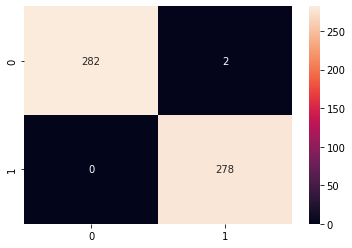

In [ ]:
print(confusion_matrix(Y_test, Y_pred))
print("Report",classification_report(Y_test, Y_pred))
print("Accuracy of Decision Tree =",accuracy_score(Y_test,Y_pred))
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt="d")

As per accuracy scores, Random forest algorithm has highest accuracy score, that's why for given dataset 'Random Forest' algorithm is best suitable to use.

Text(0.5, 0.98, 'Comparision of Accuracy')

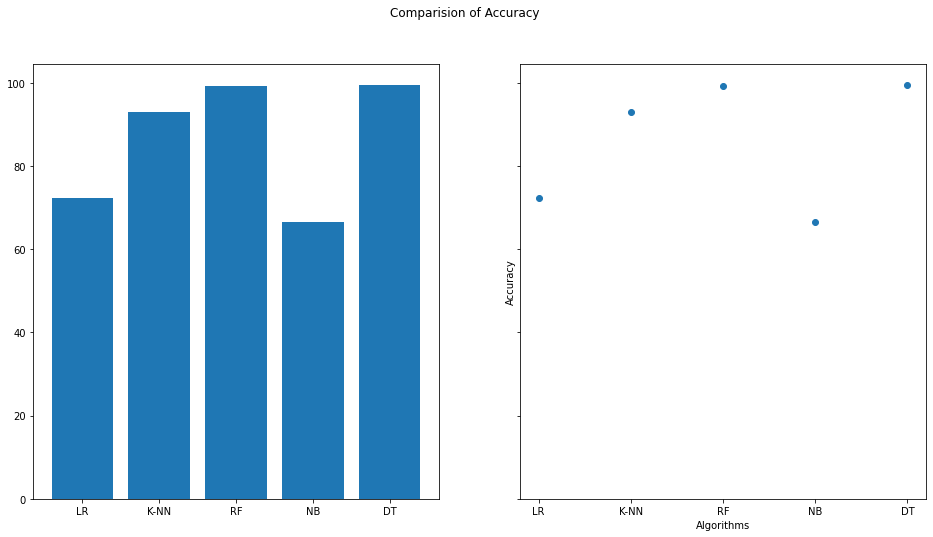

In [ ]:
import matplotlib.pyplot as plt

data = {'LR': 72.24, 'K-NN': 93.06, 'RF': 99.11, 'NB':66.55,'DT':99.52}

names = list(data.keys())
values = list(data.values())


fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

axs[0].bar(names, values)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
axs[1].scatter(names, values)

fig.suptitle('Comparision of Accuracy')

<BarContainer object of 5 artists>

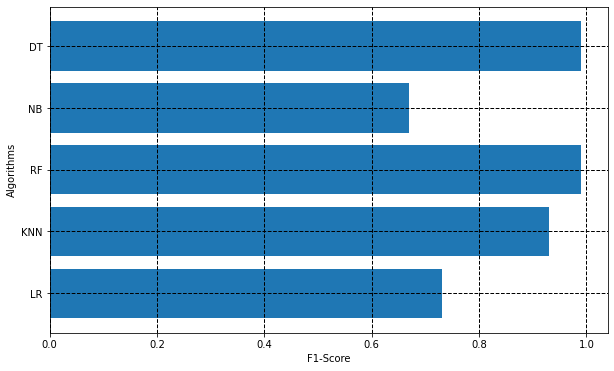

In [ ]:
data1 = {'LR': 0.73, 'KNN': 0.93, 'RF': 0.99, 'NB':0.67,'DT':0.99}
names1 = list(data1.keys())
values1 = list(data1.values())
plt.subplots(figsize=(10, 6))
plt.ylabel('Algorithms')
plt.xlabel('F1-Score')


plt.grid(color='black', linestyle='dashed', linewidth=1)
plt.barh(names1, values1)

In [ ]:
print("sample input =",X_test)

sample input = [[ 2829  1127    85 ...    47    35   104]
 [11321    34   140 ...    44     0   214]
 [ 4223   898   252 ...    47    31   472]
 ...
 [ 9780   462   254 ...    41    17   263]
 [ 9434  1099   206 ...    25    11   258]
 [ 4183   144   393 ...    86     7   300]]
